In [18]:
import json
import re
import pandas as pd
import numpy as np
import scrapy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.simplefilter('ignore')

# Read data



In [19]:
csv_file_path = 'cars_info_preprocessed.csv'
df = pd.read_csv(csv_file_path)
df

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,12852453,2003 Holden Commodore Executive VY,4499,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,12852460,2008 Toyota Yaris YR NCP90R,4999,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,12852462,2002 Holden Jackaroo SE LWB (4X4) U8,7999,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,12852463,2016 Hyundai I30 Active GD4 Series 2,14000,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


# Question 1:
Với góc nhìn của 1 người chuyên bán xe sang, tôi muốn biết những chiếc xe sang được sản xuất trong 3 năm gần đây thuộc những brand nào và phân bố số chỗ ngồi của nó như thế nào? (với xe sang là những xe có định giá trên 100k $

Đầu tiên lọc từ dataframe ban đầu 

In [20]:
df_luxury_car = df[df['Price'] > 100000]
len(df_luxury_car.value_counts())

508

Có thể thấy số lượng xe sang chỉ có 508 chiếc trong khi đó số lượng data thu thập là 17048 chiếc. Việc số lượng xe sang ít như vậy có thể là do đây phần lớn là những chiếc xe đã qua sử dụng và bán lại, nên chất lượng giảm sút công thêm việc hầu như những người sở hữu xe sang đều là những người có kinh tế ổn định hoặc dư dả nên không có nhu cầu bán xe.

In [76]:
# Thống kê số lượng xe sang theo brand
df_car_count = df_luxury_car.groupby('Brand')['Name'].count()
df_car_count = df_car_count.sort_values(ascending = False)
# Thống kê số lượng loại chỗ ngồi của các xe sang theo brand
df_Seating_Capacity_count = df_luxury_car['Seating Capacity'].value_counts()


Vẽ biểu đồ so sánh số lượng bán xe sang theo mỗi hãng và so sánh số lượng loại chỗ ngồi 

Text(0.5, 1.0, 'Count luxury car')

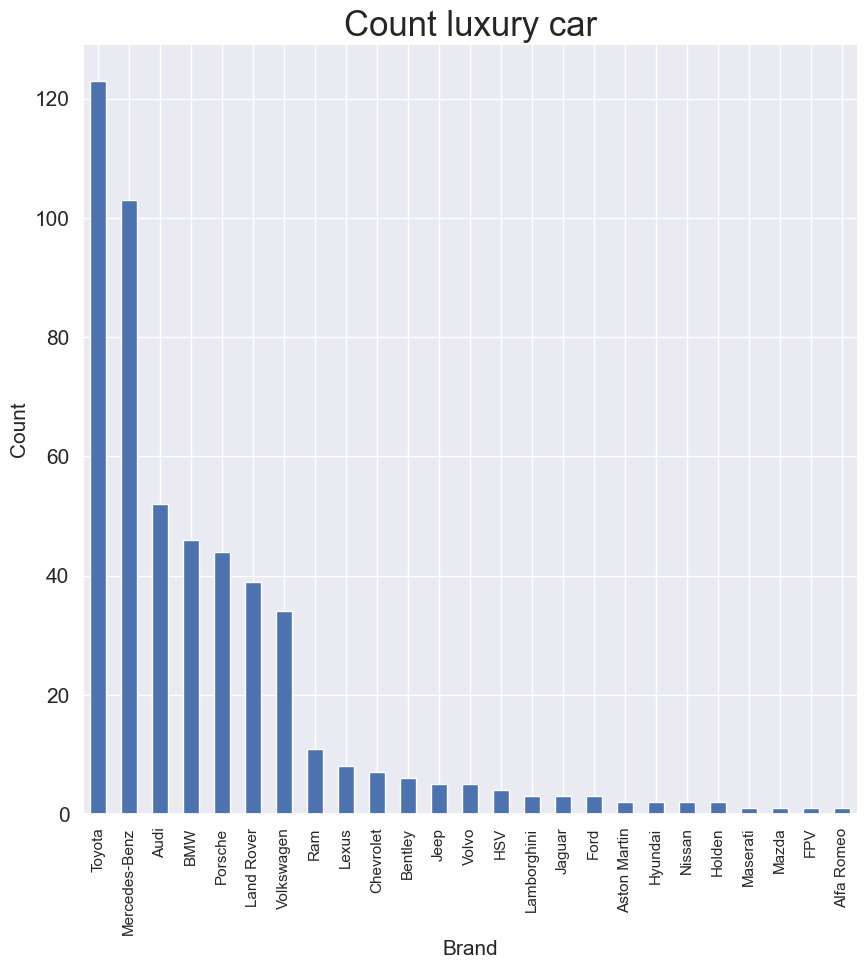

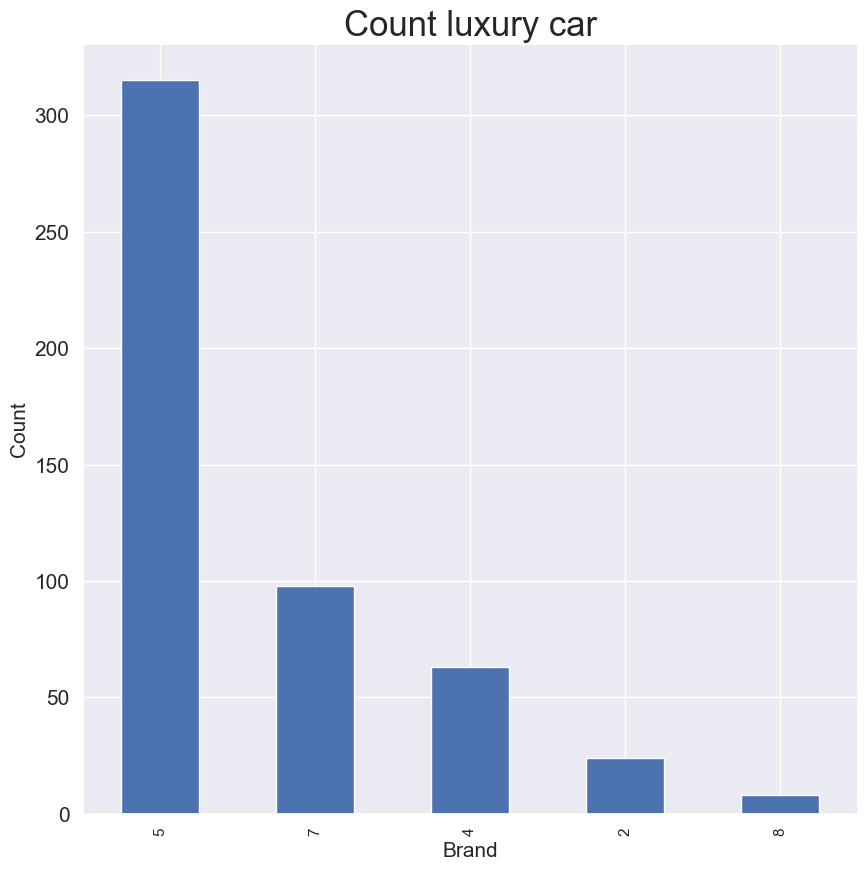

In [84]:
plt.subplots(figsize=(10,10))
df_car_count.plot.bar()
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.title('Count luxury car',fontsize=25)

plt.subplots(figsize=(10,10))
df_Seating_Capacity_count.plot.bar()
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Count luxury car',fontsize=25)

- Số lượng xe sang tập trung chủ yếu là Toyota và Mercedes - Benz
- Số loại chỗ ngồi nhiều nhất là 5 và 7 chỗ